In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [17]:
X,y=make_blobs(n_samples=1000,centers=2,n_features=2)

In [18]:
X

array([[ 8.93086279, -1.7742463 ],
       [ 8.06662853,  1.1289838 ],
       [ 7.77982006,  0.34127466],
       ...,
       [-8.99831668, 10.62924425],
       [-8.12264223, 11.09473341],
       [-8.15450546, 11.57571817]])

In [19]:
y

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,

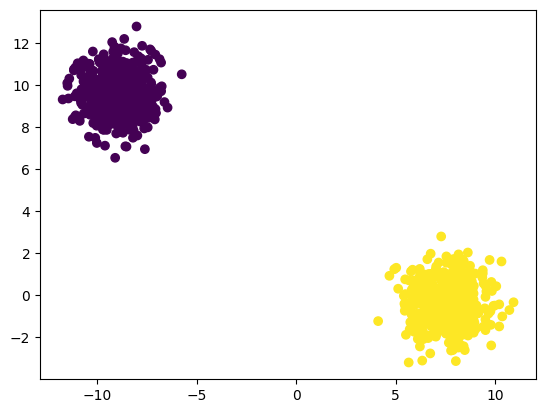

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
# standerdization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)



In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans


In [14]:
# Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    

In [15]:
wcss

[1400.0000000000005,
 457.22826446151987,
 326.5038035818211,
 269.7688294365233,
 240.32021967922208,
 184.2141204198623,
 144.21915724717195,
 125.9738765414563,
 128.34496160444738,
 100.89663311789505]

Text(0, 0.5, 'WCSS')

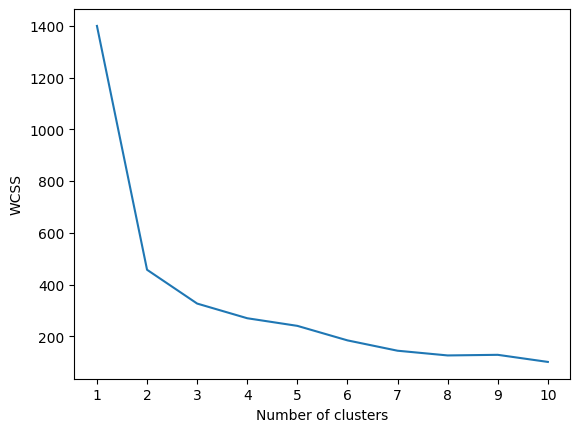

In [16]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0,

In [23]:
y_pred=kmeans.predict(X_test_scaled)

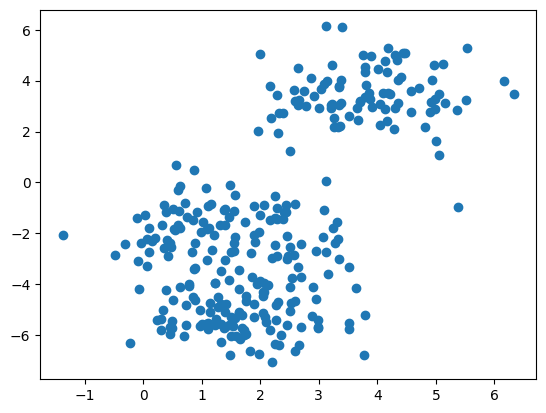

In [24]:
plt.scatter(X_test[:,0],X_test[:,1])

In [25]:
# validating the k value
# kneelocator
# sil

In [26]:
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from kneed import KneeLocator

In [29]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [30]:
kl.elbow

2

In [35]:
# silhoite 
from sklearn.metrics import silhouette_score


In [37]:
silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)


In [38]:
silhouette_coeff

[0.5882861090406698,
 0.4322302621195506,
 0.42953720069560386,
 0.3699526206660898,
 0.3846150039903364,
 0.38165943949059034,
 0.3816300754629422,
 0.35843799938592125,
 0.349720821657354]

Text(0, 0.5, 'silhouette coefficient')

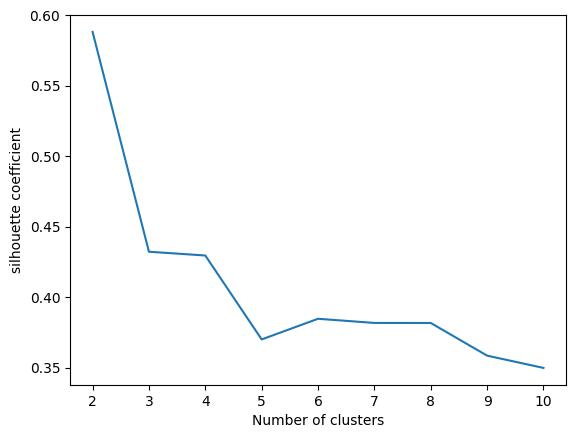

In [40]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette coefficient")